In [1]:
def sobel(image):
    Gy=np.zeros(image.shape)
    Gx=np.zeros(image.shape)
    (n_H,n_W,n_C)=image.shape
    pad=2
    f=3
    stride=1
    image=zero_pad(image,pad)
    H=int((n_H+f-2*pad)/stride)
    W=int((n_W+f-2*pad)/stride)
    Y=np.zeros((n_H,n_W,n_C),dtype=np.float32)
    

    for h in range(n_H):
        for w in range(n_W):
            for c in range(n_C):
                ver_start=stride*h
                ver_end=ver_start+f
                hor_start=stride*w
                hor_end=hor_start+f
                img_slice=image[ver_start:ver_end,hor_start:hor_end,c]
                Gx=horzEdge(img_slice,pad)
                Gy=verticalEdge(img_slice,pad)
                res=np.sqrt(np.square(Gx)+np.square(Gy))
                Y[h,w,c]=res
                
    return Y       
    
    
    

In [2]:
def zero_pad(image,pad):
    return np.pad(image,((2,2),(2,2),(0,0)),mode='constant',constant_values=0)

In [3]:
def horzEdge(image,pad):
    filt=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float32)
    return np.sum(np.multiply(image,filt))

In [4]:
def verticalEdge(image,pad):
    filt=np.array([[-1,-2,1],[0,0,0],[1,2,-1]],dtype=np.float32)
    return np.sum(np.multiply(image,filt))
    

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
image=plt.imread("valve.png")

In [11]:
image.shape

(480, 640, 3)

In [12]:
new_image=sobel(image)

In [135]:
new_image.shape

(480, 640, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5,1,'transformed image')

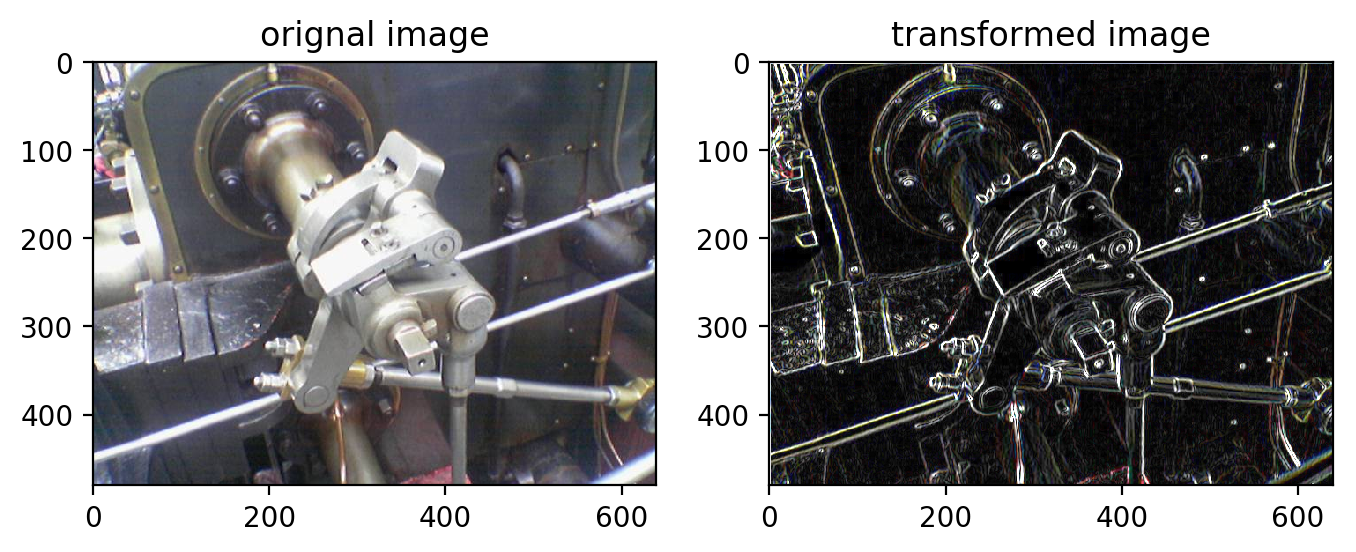

In [142]:
fig,axes=plt.subplots(1,2,figsize=(8,8),dpi=200)
axes[0].imshow(image)
axes[0].set_title("orignal image")
axes[1].imshow(new_image)
axes[1].set_title("transformed image")

In [13]:
house=plt.imread("house.jpg").astype('float32')
house/=255

In [ ]:
thosue=sobel(house)

In [ ]:
hosue.shape